Google doc link:https://docs.google.com/document/d/1tgWtZDwh1GHVXZXUuXX2kmQ7dn88zWzOPNkn7GZvtNQ/edit?usp=sharing

In [1]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

sns.set_style('darkgrid')

/Users/MengqinGong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read data
listings = pd.read_csv('listings_clean.csv', index_col=0)
listings.reset_index(inplace=True)
listings = listings[listings.price <= 1000]

In [3]:
listings.describe()

,index,id,host_id,host_response_rate,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7013.000000,7.013000e+03,7.013000e+03,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,...,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000,7013.000000
mean,3556.400970,1.657752e+07,4.545670e+07,0.967711,52.053472,94115.015970,37.765912,-122.430480,3.163981,1.317981,...,9.699843,9.894909,9.872237,9.718238,9.525168,16.297162,13.530301,2.406388,0.360473,1.514748
std,2061.451246,1.046795e+07,6.230194e+07,0.110285,176.377823,9.677458,0.022188,0.026853,1.855805,0.786174,...,0.699724,0.451522,0.524027,0.660304,0.748911,40.289679,39.992785,6.260915,2.389328,1.941369
min,0.000000,9.580000e+02,4.600000e+01,0.000000,0.000000,94102.000000,37.708380,-122.513060,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1771.000000,6.748645e+06,3.685746e+06,1.000000,1.000000,94109.000000,37.751230,-122.442780,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3550.000000,1.784150e+07,1.481852e+07,1.000000,2.000000,94114.000000,37.767400,-122.425390,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.650000
75%,5338.000000,2.548556e+07,5.910047e+07,1.000000,8.000000,94118.000000,37.784490,-122.411010,4.000000,1.500000,...,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.000000,2.000000,0.000000,2.290000
max,7150.000000,3.284519e+07,2.460479e+08,1.000000,1199.000000,94158.000000,37.810310,-122.369790,16.000000,14.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,204.000000,204.000000,51.000000,22.000000,12.800000


In [4]:
listings.additional_house_rule = listings.additional_house_rule.astype(int)
listings.have_license = listings.have_license.astype(int)

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7013 entries, 0 to 7092
Data columns (total 70 columns):
index                                           7013 non-null int64
id                                              7013 non-null int64
host_id                                         7013 non-null int64
host_since                                      7013 non-null object
host_location                                   7013 non-null object
host_response_time                              7013 non-null object
host_response_rate                              7013 non-null float64
host_is_superhost                               7013 non-null object
host_listings_count                             7013 non-null int64
host_verifications                              7013 non-null object
host_has_profile_pic                            7013 non-null object
host_identity_verified                          7013 non-null object
street                                          7013 non-null object

In [6]:
# split data into training set and test set
y = listings.price
X = listings.drop(['price'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [7]:
# Select numeric columns
numerics = ['float64', 'int64']
X_train_num = X_train.select_dtypes(include=numerics).drop(['index', 'id', 'host_id', 
                                                            'zipcode', 'latitude', 'longitude', 
                                                            'weekly_price', 'monthly_price', 
                                                            'security_deposit', 'cleaning_fee'], 
                                                           axis=1)

In [8]:
print(X_train_num.columns)

Index(['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'additional_house_rule', 'have_license'],
      dtype='object')


In [9]:
# 1. Use linear regression on numeric columns
# Before we train the linear model, we do a feature selection

#Backward Elimination
def feature_BE(X, y):
    cols = list(X.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X1 = X[cols]
        X1 = sm.add_constant(X1)
        model = sm.OLS(y,X1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    return X[cols]

In [10]:
X_train_BE= feature_BE(X_train_num, y_train)
lm1 = LinearRegression()
lm1.fit(X_train_BE, y_train)

model_results = {}
model_results['LM_BE_original_data'] = {'R2_Train': lm1.score(X_train_BE, y_train), 
                                        'R2_Test': lm1.score(X_test[X_train_BE.columns], y_test), 
                                        'MSE_Train_CV': -np.mean(cross_val_score(lm1, X_train_BE, y_train, cv=5, scoring='neg_mean_squared_error')),
                                        'MSE_Test': mean_squared_error(y_test, lm1.predict(X_test[X_train_BE.columns]))}

print('R^2 on train set: ' + str(model_results['LM_BE_original_data']['R2_Train']))
print('R^2 on test set: ' + str(model_results['LM_BE_original_data']['R2_Test']))
print('MSE on train set: ' + str(model_results['LM_BE_original_data']['MSE_Train_CV']))
print('MSE on test set: ' + str(model_results['LM_BE_original_data']['MSE_Test']))

R^2 on train set: 0.47914865325799677
R^2 on test set: 0.4981249177918107
MSE on train set: 11120.118680889093
MSE on test set: 10540.948593266781


In [33]:
# Scale data before modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

scalers = {'Standard': StandardScaler(), 'MinMax': MinMaxScaler(), 'Robust':RobustScaler(), 'Normalizer': Normalizer()}

for scalername in scalers.keys():
    scaler = scalers[scalername]
    scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns)
    y_train_reindexed = y_train.reset_index(drop=True)
    
    lm = LinearRegression()
    selected_X = feature_BE(scaled_X_train, y_train_reindexed)
    lm.fit(selected_X, y_train_reindexed)
    
    model_results['LM_BE_{}'.format(scalername)] = {'R2_Train': lm.score(selected_X, y_train_reindexed), 
                                                    'R2_Test': lm.score(pd.DataFrame(scaler.transform(X_test[X_train_num.columns]), columns=X_train_num.columns)[selected_X.columns], y_test), 
                                                    'MSE_Train_CV': -np.mean(cross_val_score(lm, selected_X, y_train_reindexed, 
                                                                                             cv=5, scoring='neg_mean_squared_error')),
                                                    'MSE_Test': mean_squared_error(y_test, 
                                                                                   lm.predict(pd.DataFrame(scaler.transform(X_test[X_train_num.columns]), columns=X_train_num.columns)[selected_X.columns]))}

    print(scalername + " R^2 on train set: " + str(model_results['LM_BE_{}'.format(scalername)]['R2_Train']) + 
          ", R^2 on test set: " + str(model_results['LM_BE_{}'.format(scalername)]['R2_Test']) +
          ', MSE on train set: ' + str(model_results['LM_BE_{}'.format(scalername)]['MSE_Train_CV']) + 
          ', MSE on test set: ' + str(model_results['LM_BE_{}'.format(scalername)]['MSE_Test']))

Standard R^2 on train set: 0.47907808800639673, R^2 on test set: 0.49806857966772894, MSE on train set: 11119.30990011257, MSE on test set: 10542.131870322846
MinMax R^2 on train set: 0.47907808800639673, R^2 on test set: 0.4980685796677286, MSE on train set: 11119.309900112568, MSE on test set: 10542.131870322854
Robust R^2 on train set: 0.47914865325799677, R^2 on test set: 0.4981249177918105, MSE on train set: 11120.11868088909, MSE on test set: 10540.948593266783
Normalizer R^2 on train set: 0.3089186884692342, R^2 on test set: 0.33916885162291177, MSE on train set: 14699.553504255286, MSE on test set: 13879.52383135605


In [12]:
for key, value in model_results.items():
    print(key + ': ' )
    print(value)

LM_BE_original_data: 
{'R2_Train': 0.47914865325799677, 'R2_Test': 0.4981249177918107, 'MSE_Train_CV': 11120.118680889093, 'MSE_Test': 10540.948593266781}
LM_BE_Standard: 
{'R2_Train': 0.47907808800639673, 'R2_Test': 0.49806857966772894, 'MSE_Train_CV': 11119.30990011257, 'MSE_Test': 10542.131870322846}
LM_BE_MinMax: 
{'R2_Train': 0.47907808800639673, 'R2_Test': 0.4980685796677286, 'MSE_Train_CV': 11119.309900112568, 'MSE_Test': 10542.131870322854}
LM_BE_Robust: 
{'R2_Train': 0.47914865325799677, 'R2_Test': 0.4981249177918105, 'MSE_Train_CV': 11120.11868088909, 'MSE_Test': 10540.948593266783}
LM_BE_Normalizer: 
{'R2_Train': 0.3089186884692342, 'R2_Test': 0.33916885162291177, 'MSE_Train_CV': 14699.553504255286, 'MSE_Test': 13879.52383135605}


In [13]:
# Check collinearity
corr = X_train_BE.assign(price=y_train.values).corr()
corr

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_shared_rooms,reviews_per_month,have_license,price
host_listings_count,1.000000,-0.031645,-0.010603,-0.042125,-0.071542,-0.096918,-0.056604,-0.162684,0.039676,0.059044,-0.010853,0.023703,0.060747,0.766162,0.777145,-0.019819,-0.196627,-0.342134,-0.008516
accommodates,-0.031645,1.000000,0.315042,0.738542,0.823736,0.539035,-0.061537,-0.070785,0.048119,0.001515,0.015094,0.002605,-0.032570,-0.066685,-0.042541,-0.057814,-0.066541,0.124123,0.592898
bathrooms,-0.010603,0.315042,1.000000,0.386327,0.359645,0.126472,0.031127,-0.062134,-0.042563,-0.107890,-0.035911,-0.049133,-0.034708,-0.008704,-0.026276,0.251661,-0.073735,0.009545,0.237245
bedrooms,-0.042125,0.738542,0.386327,1.000000,0.729941,0.459298,-0.068074,-0.092981,0.085211,0.017057,0.027790,0.012875,0.003297,-0.091201,-0.049556,-0.052057,-0.101767,0.081103,0.568151
beds,-0.071542,0.823736,0.359645,0.729941,1.000000,0.460397,-0.034765,-0.072309,0.018137,-0.046303,-0.000734,-0.014991,-0.042185,-0.112822,-0.099325,0.050862,-0.074552,0.102247,0.487672
guests_included,-0.096918,0.539035,0.126472,0.459298,0.460397,1.000000,-0.067999,0.023166,0.051772,0.015642,0.028758,-0.020899,-0.026248,-0.122307,-0.096050,-0.082873,0.034595,0.138182,0.368473
availability_30,-0.056604,-0.061537,0.031127,-0.068074,-0.034765,-0.067999,1.000000,-0.035239,-0.061686,-0.028823,-0.036188,-0.033618,-0.049737,-0.043603,-0.045719,0.126743,-0.041897,-0.144785,-0.036397
number_of_reviews,-0.162684,-0.070785,-0.062134,-0.092981,-0.072309,0.023166,-0.035239,1.000000,-0.015381,0.020440,0.077200,-0.016940,-0.026252,-0.195431,-0.188247,0.021261,0.678033,0.351350,-0.145844
review_scores_rating,0.039676,0.048119,-0.042563,0.085211,0.018137,0.051772,-0.061686,-0.015381,1.000000,0.663439,0.524418,0.449246,0.695651,-0.013318,0.013927,-0.079427,0.015925,0.078377,0.152052
review_scores_cleanliness,0.059044,0.001515,-0.107890,0.017057,-0.046303,0.015642,-0.028823,0.020440,0.663439,1.000000,0.408662,0.315454,0.531589,0.028037,0.058638,-0.185279,0.044933,0.077949,0.129999


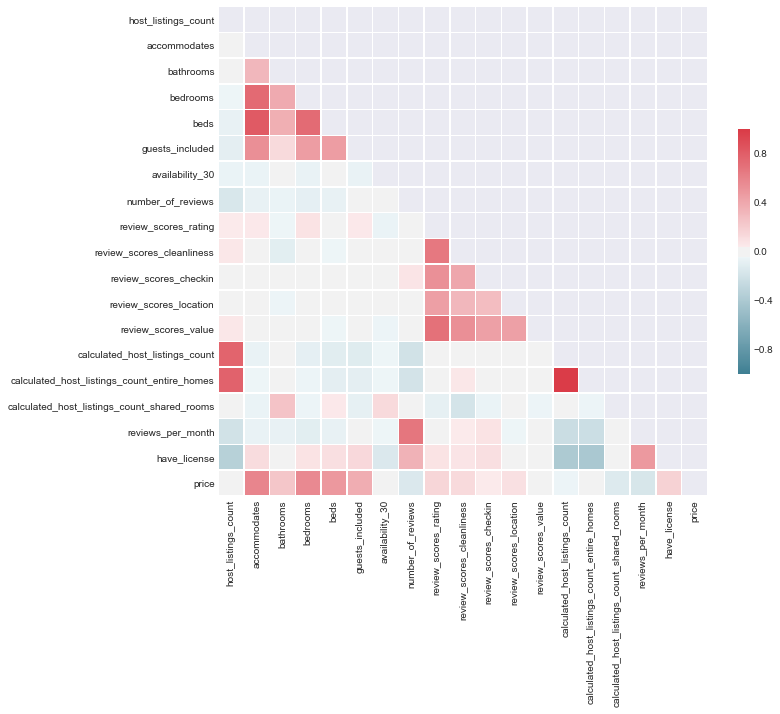

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
# Drop 
to_drop = ['beds', 'calculated_host_listings_count_entire_homes']
#to_drop = ['calculated_host_listings_count_entire_homes']

lm_BE_original_data_noncol = LinearRegression()
X_train_BE_noncol = X_train_BE.drop(to_drop, axis=1)
lm_BE_original_data_noncol.fit(X_train_BE_noncol, y_train)

model_results['LM_BE_original_data_non_colinearity'] = {'R2_Train': lm_BE_original_data_noncol.score(X_train_BE_noncol, y_train),
                                                        'R2_Test': lm_BE_original_data_noncol.score(X_test[X_train_BE_noncol.columns], y_test), 
                                        'MSE_Train_CV': -np.mean(cross_val_score(lm_BE_original_data_noncol, X_train_BE_noncol, y_train, cv=5, scoring='neg_mean_squared_error')),
                                        'MSE_Test': mean_squared_error(y_test, lm_BE_original_data_noncol.predict(X_test[X_train_BE_noncol.columns]))}

print('R^2 on train set: ' + str(model_results['LM_BE_original_data_non_colinearity']['R2_Train']))
print('R^2 on test set: ' + str(model_results['LM_BE_original_data_non_colinearity']['R2_Test']))
print('MSE on train set: ' + str(model_results['LM_BE_original_data_non_colinearity']['MSE_Train_CV']))
print('MSE on test set: ' + str(model_results['LM_BE_original_data_non_colinearity']['MSE_Test']))

R^2 on train set: 0.4750576543018007
R^2 on test set: 0.4938877073898527
MSE on train set: 11200.50061204316
MSE on test set: 10629.943282601384


Text(0,0.5,'cumulative explained variance')

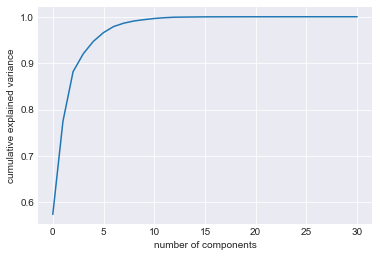

In [35]:
# PCA on normalized data
from sklearn.decomposition import PCA

normalizer = Normalizer()
normalized_X_train = normalizer.fit_transform(X_train_num)
pca = PCA().fit(normalized_X_train, y_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [36]:
# 10 components
pca1 = PCA(n_components=10)
X_PCA = pca1.fit_transform(normalized_X_train, y_train)

lm_PCA = LinearRegression()
lm_PCA.fit(X_PCA, y_train)

model_results['LM_PCA'] = {'R2_Train': lm_PCA.score(X_PCA, y_train), 
                           'R2_Test': lm_PCA.score(pca1.transform(normalizer.transform(X_test[X_train_num.columns])), y_test),
                           'MSE_Train_CV': -np.mean(cross_val_score(lm_PCA, X_PCA, y_train, cv=5, scoring='neg_mean_squared_error')),
                           'MSE_Test': mean_squared_error(y_test, lm_PCA.predict(pca1.transform(normalizer.transform(X_test[X_train_num.columns]))))}

print('R^2 on train set: ' + str(model_results['LM_PCA']['R2_Train']))
print('R^2 on test set: ' + str(model_results['LM_PCA']['R2_Test']))
print('MSE on train set: ' + str(model_results['LM_PCA']['MSE_Train_CV']))
print('MSE on test set: ' + str(model_results['LM_PCA']['MSE_Test']))

R^2 on train set: 0.09137757876985819
R^2 on test set: 0.09862265250178259
MSE on train set: 19259.12550532704
MSE on test set: 18931.74740078546


In [21]:
# Add categorical features

BE_noncol_cat_columns = list(X_train_BE_noncol.columns)
BE_noncol_cat_columns.extend(['neighbourhood', 'property_type', 'room_type'])
X_BE_noncol_cat_dummies = pd.get_dummies(X[BE_noncol_cat_columns])

X_train_BE_noncol_cat_dummies, X_test_BE_noncol_cat_dummies, y_train_cat, y_test_cat = train_test_split(X_BE_noncol_cat_dummies, y, test_size=0.3, random_state=66)

X_train_BE_noncol_cat_dummies

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,number_of_reviews,review_scores_rating,review_scores_cleanliness,...,property_type_Resort,property_type_Serviced apartment,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
3537,2,8,5.5,6.0,10.0,1,0,0,98.0,10.0,...,0,0,0,0,0,0,0,1,0,0
2240,1,4,2.0,2.0,2.0,1,0,20,100.0,10.0,...,0,0,0,0,0,0,0,1,0,0
6877,5,1,1.0,1.0,1.0,1,5,0,98.0,10.0,...,0,0,0,0,0,0,0,0,1,0
4464,87,3,1.0,1.0,1.0,1,30,1,60.0,10.0,...,0,0,0,0,0,0,0,1,0,0
5346,1,2,1.0,0.0,1.0,1,19,27,94.0,8.0,...,0,0,0,0,0,0,0,0,1,0
2142,8,1,2.0,1.0,1.0,1,10,185,96.0,9.0,...,0,0,0,0,0,0,0,0,0,1
3238,43,2,1.0,1.0,1.0,1,0,1,100.0,6.0,...,0,0,0,0,0,0,0,0,1,0
1820,1,4,1.0,1.0,2.0,3,30,13,98.0,10.0,...,0,0,0,0,0,0,0,0,1,0
4523,1,4,1.0,1.0,2.0,2,4,20,84.0,8.0,...,0,0,0,0,0,0,0,1,0,0
1409,5,2,1.0,1.0,2.0,1,30,109,89.0,9.0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
lm_BE_original_noncol_cat = LinearRegression()
lm_BE_original_noncol_cat.fit(X_train_BE_noncol_cat_dummies, y_train_cat)

model_results['LM_BE_original_data_non_colinearity_category'] = {'R2_Train': lm_BE_original_noncol_cat.score(X_train_BE_noncol_cat_dummies, y_train_cat), 
                                                                 'R2_Test': lm_BE_original_noncol_cat.score(X_test_BE_noncol_cat_dummies, y_test_cat), 
                                        'MSE_Train_CV': -np.mean(cross_val_score(lm_BE_original_noncol_cat, X_train_BE_noncol_cat_dummies, y_train_cat, cv=5, scoring='neg_mean_squared_error')),
                                     'MSE_Test': mean_squared_error(y_test_cat, lm_BE_original_noncol_cat.predict(X_test_BE_noncol_cat_dummies))}

print('R^2 on train set: ' + str(model_results['LM_BE_original_data_non_colinearity_category']['R2_Train']))
print('R^2 on test set: ' + str(model_results['LM_BE_original_data_non_colinearity_category']['R2_Test']))
print('MSE on train set: ' + str(model_results['LM_BE_original_data_non_colinearity_category']['MSE_Train_CV']))
print('MSE on test set: ' + str(model_results['LM_BE_original_data_non_colinearity_category']['MSE_Test']))

R^2 on train set: 0.5714672205434664
R^2 on test set: 0.5940360450186195
MSE on train set: 9553.415657612159
MSE on test set: 8526.514528973712


In [23]:
# Try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_data_columns = list(X_train_num.columns)
rf_data_columns.extend(['neighbourhood', 'property_type', 'room_type', 'host_response_time', 'host_is_superhost', 
                        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy'])
rf_data_X = pd.get_dummies(X[rf_data_columns])

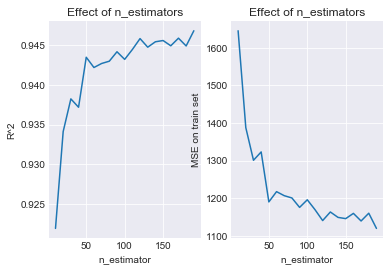

In [24]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rf_data_X, y, test_size=0.3, random_state=66)

rfreg = RandomForestRegressor(n_jobs=-1)

n_estimators = np.arange(10, 200, 10)
scores_r2 = []
scores_MSE_train = []


for n in n_estimators:
    rfreg.set_params(n_estimators=n)
    rfreg.fit(X_train_rf, y_train_rf)
    scores_r2.append(rfreg.score(X_train_rf, y_train_rf))
    scores_MSE_train.append(mean_squared_error(y_train_rf, rfreg.predict(X_train_rf)))
    

plt.subplot(1,2,1)
plt.plot(n_estimators, scores_r2)
plt.title('Effect of n_estimators')
plt.xlabel('n_estimator')
plt.ylabel('R^2')

plt.subplot(1,2,2)
plt.plot(n_estimators, scores_MSE_train)
plt.title('Effect of n_estimators')
plt.xlabel('n_estimator')
plt.ylabel('MSE on train set')

plt.show()

In [25]:
rfreg = RandomForestRegressor(n_jobs=-1, n_estimators=190)
rfreg.fit(X_train_rf, y_train_rf)

print(rfreg.score(X_train_rf, y_train_rf))
print(mean_squared_error(y_train_rf, rfreg.predict(X_train_rf)))
print(rfreg.score(X_test_rf, y_test_rf))
print(mean_squared_error(y_test_rf, rfreg.predict(X_test_rf)))

0.9454564060287317
1149.0288134521259
0.620235914875948
7976.235204283474


In [26]:
rfreg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [27]:
# GridSearchCV hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = np.arange(100, 200, 10)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10, 20, 25]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 20, 50]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [28]:
rfr = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [29]:
grid_search.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]), 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 20, 25, None], 'min_samples_leaf': [1, 5, 20, 50], 'bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [31]:
best_grid = grid_search.best_estimator_

print(best_grid.score(X_train_rf, y_train_rf))
print(mean_squared_error(y_train_rf, best_grid.predict(X_train_rf)))
print(best_grid.score(X_test_rf, y_test_rf))
print(mean_squared_error(y_test_rf, best_grid.predict(X_test_rf)))

0.9472306652504525
1111.6518307515676
0.6315199758957735
7739.23458131984


Feature ranking:
1. feature bedrooms (0.111054)
2. feature accommodates (0.083135)
3. feature bathrooms (0.079152)
4. feature beds (0.046686)
5. feature room_type_Entire home/apt (0.036040)
6. feature reviews_per_month (0.032954)
7. feature guests_included (0.029107)
8. feature calculated_host_listings_count_entire_homes (0.027959)
9. feature number_of_reviews (0.025851)
10. feature number_of_reviews_ltm (0.025715)
11. feature availability_365 (0.025585)
12. feature availability_90 (0.025452)
13. feature availability_60 (0.024574)
14. feature minimum_nights_avg_ntm (0.024310)
15. feature room_type_Private room (0.022442)
16. feature minimum_nights (0.022049)
17. feature maximum_nights (0.020980)
18. feature calculated_host_listings_count_private_rooms (0.020817)
19. feature maximum_nights_avg_ntm (0.019518)
20. feature host_listings_count (0.019184)
21. feature availability_30 (0.019112)
22. feature calculated_host_listings_count (0.018604)
23. feature have_license (0.018464)
24. featu

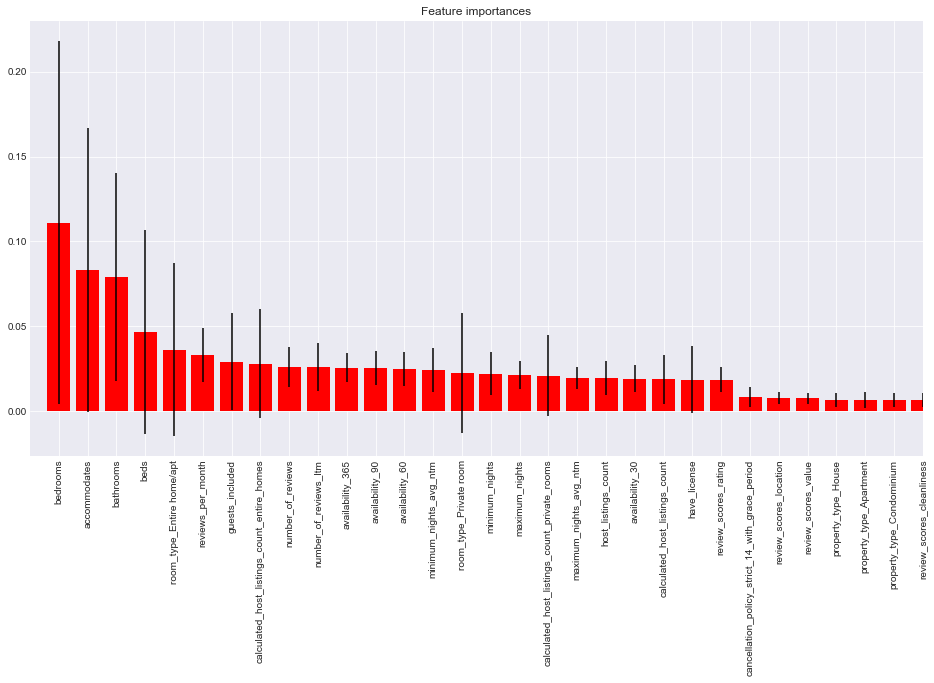

In [32]:
importances = best_grid.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_grid.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_rf.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train_rf.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(X_train_rf.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_rf.shape[1]), X_train_rf.columns[indices], rotation=90)
plt.xlim([-1, 30])
plt.show()
